# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from L2.sga import SGA
from L2.mutation import reverse_sequence_mutation, transposition_mutation
from L2.replacement import mu_plus_lambda_replacement
from L2.genetic_operator import pmx

%matplotlib inline

## Input data

In [3]:
# kroa100

n = 100
print('Problem size: %d' % n)

coords = np.array([[ 1380.,   939.],
       [ 2848.,    96.],
       [ 3510.,  1671.],
       [  457.,   334.],
       [ 3888.,   666.],
       [  984.,   965.],
       [ 2721.,  1482.],
       [ 1286.,   525.],
       [ 2716.,  1432.],
       [  738.,  1325.],
       [ 1251.,  1832.],
       [ 2728.,  1698.],
       [ 3815.,   169.],
       [ 3683.,  1533.],
       [ 1247.,  1945.],
       [  123.,   862.],
       [ 1234.,  1946.],
       [  252.,  1240.],
       [  611.,   673.],
       [ 2576.,  1676.],
       [  928.,  1700.],
       [   53.,   857.],
       [ 1807.,  1711.],
       [  274.,  1420.],
       [ 2574.,   946.],
       [  178.,    24.],
       [ 2678.,  1825.],
       [ 1795.,   962.],
       [ 3384.,  1498.],
       [ 3520.,  1079.],
       [ 1256.,    61.],
       [ 1424.,  1728.],
       [ 3913.,   192.],
       [ 3085.,  1528.],
       [ 2573.,  1969.],
       [  463.,  1670.],
       [ 3875.,   598.],
       [  298.,  1513.],
       [ 3479.,   821.],
       [ 2542.,   236.],
       [ 3955.,  1743.],
       [ 1323.,   280.],
       [ 3447.,  1830.],
       [ 2936.,   337.],
       [ 1621.,  1830.],
       [ 3373.,  1646.],
       [ 1393.,  1368.],
       [ 3874.,  1318.],
       [  938.,   955.],
       [ 3022.,   474.],
       [ 2482.,  1183.],
       [ 3854.,   923.],
       [  376.,   825.],
       [ 2519.,   135.],
       [ 2945.,  1622.],
       [  953.,   268.],
       [ 2628.,  1479.],
       [ 2097.,   981.],
       [  890.,  1846.],
       [ 2139.,  1806.],
       [ 2421.,  1007.],
       [ 2290.,  1810.],
       [ 1115.,  1052.],
       [ 2588.,   302.],
       [  327.,   265.],
       [  241.,   341.],
       [ 1917.,   687.],
       [ 2991.,   792.],
       [ 2573.,   599.],
       [   19.,   674.],
       [ 3911.,  1673.],
       [  872.,  1559.],
       [ 2863.,   558.],
       [  929.,  1766.],
       [  839.,   620.],
       [ 3893.,   102.],
       [ 2178.,  1619.],
       [ 3822.,   899.],
       [  378.,  1048.],
       [ 1178.,   100.],
       [ 2599.,   901.],
       [ 3416.,   143.],
       [ 2961.,  1605.],
       [  611.,  1384.],
       [ 3113.,   885.],
       [ 2597.,  1830.],
       [ 2586.,  1286.],
       [  161.,   906.],
       [ 1429.,   134.],
       [  742.,  1025.],
       [ 1625.,  1651.],
       [ 1187.,   706.],
       [ 1787.,  1009.],
       [   22.,   987.],
       [ 3640.,    43.],
       [ 3756.,   882.],
       [  776.,   392.],
       [ 1724.,  1642.],
       [  198.,  1810.],
       [ 3950.,  1558.]])


A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

# p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
# print('Optimal solution:\n', p)

Problem size: 100
Distance matrix:
 [[    0.          1692.82987923  2252.27085405 ...,   782.65254104
   1468.2523625   2643.49408927]
 [ 1692.82987923     0.          1708.46978317 ...,  1911.41099714
   3155.99366286  1830.8052873 ]
 [ 2252.27085405  1708.46978317     0.         ...,  1786.23542681
   3314.91553437   454.27854891]
 ..., 
 [  782.65254104  1911.41099714  1786.23542681 ...,     0.          1535.21985396
   2227.58434184]
 [ 1468.2523625   3155.99366286  3314.91553437 ...,  1535.21985396     0.
   3760.45316418]
 [ 2643.49408927  1830.8052873    454.27854891 ...,  2227.58434184
   3760.45316418     0.        ]]


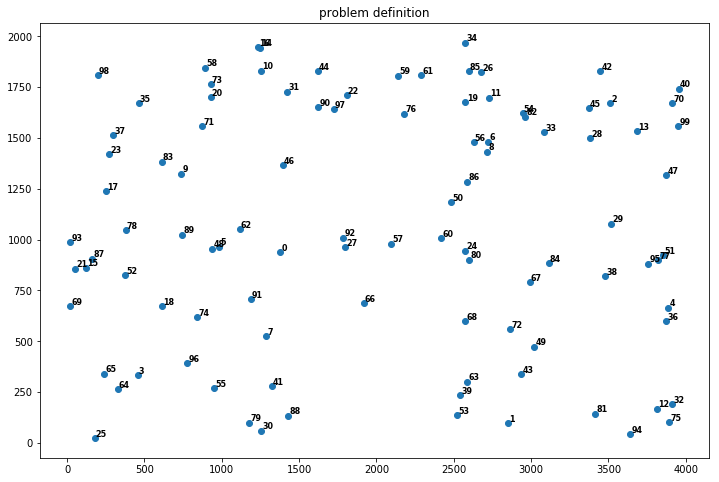

In [4]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('problem definition')

plt.show()

## Objective function

In [5]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

## SGA-PMX

In [22]:
sga_pmx = SGA(tsp_objective_function, chromosome_length=n, 
              mutation=reverse_sequence_mutation,
              replacement=mu_plus_lambda_replacement,
              genetic_operator=pmx)

In [23]:
best, best_chromosome = sga_pmx.evolve(population_size=50,
                                       number_of_iterations=2500,
                                       crossover_probability=0.95,
                                       mutation_probability=0.25)

  0     0.02322817 147918.45892878 163919.74437412 170071.94816167 5633.33184345
  1     0.03393126 147918.45892878 155939.35782419 161708.31145864 4006.43487204
  2     0.04582906 142559.64502805 151706.17116525 155675.23536965 2531.40792597
  3     0.05501246 141406.81308457 148929.37183293 151074.33859414 2569.04087851
  4     0.06579804 139815.34448877 146221.10381104 149697.34479129 2503.83290623
  5     0.07540631 135465.29434522 143772.62543665 147053.81906249 2345.61656903
  6     0.08482242 135243.78388137 141281.36089506 143788.52444326 2368.37574389
  7     0.09460354 133860.85663964 138618.01795311 141558.83796065 2279.65120177
  8     0.10599470 131540.69298148 136257.00401502 138480.10070119 1562.04440444
  9     0.11649060 131386.03833606 134740.26537208 136170.43362755 1346.70955968
 10     0.12540507 130660.74243301 133211.88570482 135243.78388137 1365.86182850
 11     0.13604307 127548.22780802 131933.13865603 133912.37508377 1286.45415675
 12     0.14550257 126711.17

105     0.84889889 64943.99132347 65103.54301324 65121.27097877  53.18389659
106     0.85660577 64360.80421943 64983.86198376 65121.27097877 164.57809478
107     0.86472726 64360.80421943 64880.38063258 64943.99132347 171.16538723
108     0.87474847 64031.38344131 64628.22592760 64943.99132347 285.48515835
109     0.88250256 64031.38344131 64358.29767660 64532.83287300 111.15589408
110     0.88987327 63711.00280743 64237.74113409 64360.80421943 165.39317603
111     0.89772153 63711.00280743 64041.23207823 64360.80421943 143.50266502
112     0.90477848 62842.10344573 63944.92035856 64031.38344131 193.06258581
113     0.91324878 62551.48210381 63728.88556578 64031.38344131 354.06508403
114     0.92171288 62551.48210381 63533.77735280 63899.46016548 383.30699551
115     0.92922878 62144.59858613 63272.32379500 63711.00280743 475.95849033
116     0.93847871 62144.59858613 62869.82828510 63711.00280743 359.51828865
117     0.94525123 62144.59858613 62630.20431446 62842.10344573 209.84425250

231     1.66219521 41777.62299624 41777.62299624 41777.62299624   0.00000000
232     1.66791940 41528.86212288 41764.27224495 41777.62299624  53.33279056
233     1.67614818 41291.52270626 41658.85889441 41777.62299624 134.53639586
234     1.68511224 41291.52270626 41507.38607582 41777.62299624 128.37788668
235     1.69165063 41291.52270626 41397.55105351 41540.28357962 119.66814647
236     1.69716287 41276.40682804 41291.22038869 41291.52270626   2.11622295
237     1.70273781 40915.87345751 41269.47755538 41291.52270626  57.24282999
238     1.70847440 40915.87345751 41142.87928131 41276.40682804 168.41035778
239     1.71411109 40911.82565421 40915.79250144 40915.87345751   0.56669246
240     1.71973777 40911.82565421 40912.87808306 40915.87345751   1.77550514
241     1.72533202 40730.84551440 40908.20605141 40911.82565421  25.33721957
242     1.73103642 40730.84551440 40772.74095988 40911.82565421  74.75280579
243     1.73705506 40730.84551440 40730.84551440 40730.84551440   0.00000000

338     2.27537227 35638.69926197 35638.69926197 35638.69926197   0.00000000
339     2.28100777 35638.69926197 35638.69926197 35638.69926197   0.00000000
340     2.28728890 35353.10234079 35632.98732354 35638.69926197  39.98356897
341     2.29321241 35353.10234079 35393.08590975 35638.69926197  99.09842787
342     2.29872060 35127.49006378 35348.59009525 35353.10234079  31.58571878
343     2.30424356 35044.70604880 35175.60820852 35353.10234079  94.97828006
344     2.30989695 35044.70604880 35124.17870318 35127.49006378  16.22228765
345     2.31526423 35044.70604880 35059.60717149 35127.49006378  31.80457997
346     2.32083082 35044.70604880 35044.70604880 35044.70604880   0.00000000
347     2.32583690 35044.70604880 35044.70604880 35044.70604880   0.00000000
348     2.33135319 35044.70604880 35044.70604880 35044.70604880   0.00000000
349     2.33682966 35019.82289450 35044.20838571 35044.70604880   3.48364160
350     2.34237027 35019.82289450 35025.79485153 35044.70604880  10.62717542

447     2.88517523 32356.70561157 32356.70561157 32356.70561157   0.00000000
448     2.89103794 32356.70561157 32356.70561157 32356.70561157   0.00000000
449     2.89649749 32270.31584435 32354.97781623 32356.70561157  12.09456741
450     2.90192485 32053.73946988 32279.80667961 32356.70561157  45.19005716
451     2.90715814 32053.73946988 32248.65820690 32270.31584435  64.97291234
452     2.91240382 32053.73946988 32064.97455324 32270.31584435  45.61526543
453     2.91780734 32053.73946988 32053.73946988 32053.73946988   0.00000000
454     2.92347860 32053.73946988 32053.73946988 32053.73946988   0.00000000
455     2.92911267 32053.73946988 32053.73946988 32053.73946988   0.00000000
456     2.93464541 32053.73946988 32053.73946988 32053.73946988   0.00000000
457     2.94002128 32053.73946988 32053.73946988 32053.73946988   0.00000000
458     2.94580507 32053.73946988 32053.73946988 32053.73946988   0.00000000
459     2.95153809 32053.73946988 32053.73946988 32053.73946988   0.00000000

558     3.49947596 29701.13478112 29701.13478112 29701.13478112   0.00000000
559     3.50513029 29701.13478112 29701.13478112 29701.13478112   0.00000000
560     3.51067162 29701.13478112 29701.13478112 29701.13478112   0.00000000
561     3.51603246 29701.13478112 29701.13478112 29701.13478112   0.00000000
562     3.52138472 29701.13478112 29701.13478112 29701.13478112   0.00000000
563     3.52681947 29701.13478112 29701.13478112 29701.13478112   0.00000000
564     3.53222513 29701.13478112 29701.13478112 29701.13478112   0.00000000
565     3.53765893 29701.13478112 29701.13478112 29701.13478112   0.00000000
566     3.54316640 29701.13478112 29701.13478112 29701.13478112   0.00000000
567     3.54866338 29701.13478112 29701.13478112 29701.13478112   0.00000000
568     3.55377412 29701.13478112 29701.13478112 29701.13478112   0.00000000
569     3.55927229 29701.13478112 29701.13478112 29701.13478112   0.00000000
570     3.56506371 29701.13478112 29701.13478112 29701.13478112   0.00000000

667     4.10509992 29281.70973824 29282.03073900 29282.85616951   0.51474636
668     4.11157870 29220.30377947 29280.48161907 29281.70973824   8.59683423
669     4.11697149 29220.30377947 29232.58497123 29281.70973824  24.56238351
670     4.12290978 29220.30377947 29220.30377947 29220.30377947   0.00000000
671     4.12878895 29220.30377947 29220.30377947 29220.30377947   0.00000000
672     4.13428569 29220.30377947 29220.30377947 29220.30377947   0.00000000
673     4.13939428 29220.30377947 29220.30377947 29220.30377947   0.00000000
674     4.14499903 29220.30377947 29220.30377947 29220.30377947   0.00000000
675     4.15075541 28708.12500462 29210.06020397 29220.30377947  71.70502848
676     4.15623236 28708.12500462 28809.24868430 29220.30377947 202.43879010
677     4.16184235 28708.12500462 28708.12500462 28708.12500462   0.00000000
678     4.16751957 28586.50482799 28705.69260109 28708.12500462  17.02682473
679     4.17322445 28517.98696129 28614.32331304 28708.12500462  53.57217578

777     4.71831322 28067.35122598 28067.35122598 28067.35122598   0.00000000
778     4.72453499 28067.35122598 28067.35122598 28067.35122598   0.00000000
779     4.73017573 28067.35122598 28067.35122598 28067.35122598   0.00000000
780     4.73572516 28067.35122598 28067.35122598 28067.35122598   0.00000000
781     4.74101138 28067.35122598 28067.35122598 28067.35122598   0.00000000
782     4.74654603 28067.35122598 28067.35122598 28067.35122598   0.00000000
783     4.75192404 28067.35122598 28067.35122598 28067.35122598   0.00000000
784     4.75727797 28067.35122598 28067.35122598 28067.35122598   0.00000000
785     4.76277304 28061.61785764 28067.23655861 28067.35122598   0.80267157
786     4.76872468 28061.61785764 28063.56720287 28067.35122598   2.71594687
787     4.77433038 28061.61785764 28061.61785764 28061.61785764   0.00000000
788     4.77972889 28061.61785764 28061.61785764 28061.61785764   0.00000000
789     4.78526974 28061.61785764 28061.61785764 28061.61785764   0.00000000

887     5.33021212 27446.61576972 27446.61576972 27446.61576972   0.00000000
888     5.33624005 27305.92071443 27443.80186862 27446.61576972  19.69730774
889     5.34178257 27305.92071443 27339.68752770 27446.61576972  60.08848460
890     5.34753609 27305.92071443 27305.92071443 27305.92071443   0.00000000
891     5.35309386 27305.92071443 27305.92071443 27305.92071443   0.00000000
892     5.35845137 27305.92071443 27305.92071443 27305.92071443   0.00000000
893     5.36388755 27305.92071443 27305.92071443 27305.92071443   0.00000000
894     5.36930609 27305.92071443 27305.92071443 27305.92071443   0.00000000
895     5.37505221 27305.92071443 27305.92071443 27305.92071443   0.00000000
896     5.38073254 27305.92071443 27305.92071443 27305.92071443   0.00000000
897     5.38596702 27305.92071443 27305.92071443 27305.92071443   0.00000000
898     5.39157271 27305.92071443 27305.92071443 27305.92071443   0.00000000
899     5.39733648 27305.92071443 27305.92071443 27305.92071443   0.00000000

997     5.94236016 26450.73244470 26450.73244470 26450.73244470   0.00000000
998     5.94827485 26450.73244470 26450.73244470 26450.73244470   0.00000000
999     5.95383191 26450.73244470 26450.73244470 26450.73244470   0.00000000
1000     5.95946479 26450.73244470 26450.73244470 26450.73244470   0.00000000
1001     5.96530533 26450.73244470 26450.73244470 26450.73244470   0.00000000
1002     5.97093821 26450.73244470 26450.73244470 26450.73244470   0.00000000
1003     5.97651458 26450.73244470 26450.73244470 26450.73244470   0.00000000
1004     5.98216009 26450.73244470 26450.73244470 26450.73244470   0.00000000
1005     5.98762941 26450.73244470 26450.73244470 26450.73244470   0.00000000
1006     5.99324727 26450.73244470 26450.73244470 26450.73244470   0.00000000
1007     5.99877596 26450.73244470 26450.73244470 26450.73244470   0.00000000
1008     6.00444126 26450.73244470 26450.73244470 26450.73244470   0.00000000
1009     6.00990939 26450.73244470 26450.73244470 26450.73244470   

1107     6.55581474 26081.92081576 26081.92081576 26081.92081576   0.00000000
1108     6.56109643 26081.92081576 26081.92081576 26081.92081576   0.00000000
1109     6.56685829 26036.28095855 26081.00801861 26081.92081576   6.38958001
1110     6.57265544 26036.28095855 26047.23452428 26081.92081576  19.49201307
1111     6.57788467 26036.28095855 26036.28095855 26036.28095855   0.00000000
1112     6.58316445 26036.28095855 26036.28095855 26036.28095855   0.00000000
1113     6.58903456 26036.28095855 26036.28095855 26036.28095855   0.00000000
1114     6.59435248 26036.28095855 26036.28095855 26036.28095855   0.00000000
1115     6.59973168 26036.28095855 26036.28095855 26036.28095855   0.00000000
1116     6.60527277 26036.28095855 26036.28095855 26036.28095855   0.00000000
1117     6.61085081 26036.28095855 26036.28095855 26036.28095855   0.00000000
1118     6.61667156 26036.28095855 26036.28095855 26036.28095855   0.00000000
1119     6.62192369 26036.28095855 26036.28095855 26036.28095855

1217     7.16781163 25878.33146344 25878.33146344 25878.33146344   0.00000000
1218     7.17328429 25878.33146344 25878.33146344 25878.33146344   0.00000000
1219     7.17914796 25878.33146344 25878.33146344 25878.33146344   0.00000000
1220     7.18522501 25878.33146344 25878.33146344 25878.33146344   0.00000000
1221     7.19078493 25878.33146344 25878.33146344 25878.33146344   0.00000000
1222     7.19634390 25878.33146344 25878.33146344 25878.33146344   0.00000000
1223     7.20186424 25878.33146344 25878.33146344 25878.33146344   0.00000000
1224     7.20751905 25878.33146344 25878.33146344 25878.33146344   0.00000000
1225     7.21303701 25878.33146344 25878.33146344 25878.33146344   0.00000000
1226     7.21831250 25878.33146344 25878.33146344 25878.33146344   0.00000000
1227     7.22362828 25878.33146344 25878.33146344 25878.33146344   0.00000000
1228     7.22888279 25878.33146344 25878.33146344 25878.33146344   0.00000000
1229     7.23421884 25878.33146344 25878.33146344 25878.33146344

1327     7.77943587 24840.53698032 24840.53698032 24840.53698032   0.00000000
1328     7.78530192 24840.53698032 24840.53698032 24840.53698032   0.00000000
1329     7.79033542 24840.53698032 24840.53698032 24840.53698032   0.00000000
1330     7.79583454 24840.53698032 24840.53698032 24840.53698032   0.00000000
1331     7.80147910 24840.53698032 24840.53698032 24840.53698032   0.00000000
1332     7.80692029 24840.53698032 24840.53698032 24840.53698032   0.00000000
1333     7.81217337 24840.53698032 24840.53698032 24840.53698032   0.00000000
1334     7.81765270 24840.53698032 24840.53698032 24840.53698032   0.00000000
1335     7.82306099 24840.53698032 24840.53698032 24840.53698032   0.00000000
1336     7.82854462 24840.53698032 24840.53698032 24840.53698032   0.00000000
1337     7.83389854 24840.53698032 24840.53698032 24840.53698032   0.00000000
1338     7.83945084 24840.53698032 24840.53698032 24840.53698032   0.00000000
1339     7.84435177 24840.53698032 24840.53698032 24840.53698032

1437     8.39093256 23891.09835126 24581.28543953 24595.37089031  98.59815547
1438     8.39629745 23891.09835126 24003.78195751 24595.37089031 258.19057761
1439     8.40181589 23891.09835126 23891.09835126 23891.09835126   0.00000000
1440     8.40734291 23891.09835126 23891.09835126 23891.09835126   0.00000000
1441     8.41295171 23891.09835126 23891.09835126 23891.09835126   0.00000000
1442     8.41853166 23891.09835126 23891.09835126 23891.09835126   0.00000000
1443     8.42415714 23891.09835126 23891.09835126 23891.09835126   0.00000000
1444     8.42971492 23891.09835126 23891.09835126 23891.09835126   0.00000000
1445     8.43510389 23891.09835126 23891.09835126 23891.09835126   0.00000000
1446     8.44060540 23891.09835126 23891.09835126 23891.09835126   0.00000000
1447     8.44601250 23891.09835126 23891.09835126 23891.09835126   0.00000000
1448     8.45154643 23891.09835126 23891.09835126 23891.09835126   0.00000000
1449     8.45654082 23891.09835126 23891.09835126 23891.09835126

1548     9.00365663 23424.18194292 23424.18194292 23424.18194292   0.00000000
1549     9.00928736 23424.18194292 23424.18194292 23424.18194292   0.00000000
1550     9.01481271 23221.06394592 23420.11958298 23424.18194292  28.43651958
1551     9.02041984 23221.06394592 23259.24059299 23424.18194292  78.09780043
1552     9.02569747 23221.06394592 23221.06394592 23221.06394592   0.00000000
1553     9.03104234 23221.06394592 23221.06394592 23221.06394592   0.00000000
1554     9.03681731 23221.06394592 23221.06394592 23221.06394592   0.00000000
1555     9.04260254 23221.06394592 23221.06394592 23221.06394592   0.00000000
1556     9.04813790 23221.06394592 23221.06394592 23221.06394592   0.00000000
1557     9.05376887 23221.06394592 23221.06394592 23221.06394592   0.00000000
1558     9.05926967 23221.06394592 23221.06394592 23221.06394592   0.00000000
1559     9.06492257 23221.06394592 23221.06394592 23221.06394592   0.00000000
1560     9.07047081 23221.06394592 23221.06394592 23221.06394592

1657     9.61181474 22965.42347425 22965.42347425 22965.42347425   0.00000000
1658     9.61783266 22965.42347425 22965.42347425 22965.42347425   0.00000000
1659     9.62357330 22965.42347425 22965.42347425 22965.42347425   0.00000000
1660     9.62908649 22965.42347425 22965.42347425 22965.42347425   0.00000000
1661     9.63480401 22965.42347425 22965.42347425 22965.42347425   0.00000000
1662     9.64034820 22965.42347425 22965.42347425 22965.42347425   0.00000000
1663     9.64595675 22965.42347425 22965.42347425 22965.42347425   0.00000000
1664     9.65124702 22965.42347425 22965.42347425 22965.42347425   0.00000000
1665     9.65679383 22965.42347425 22965.42347425 22965.42347425   0.00000000
1666     9.66222239 22965.42347425 22965.42347425 22965.42347425   0.00000000
1667     9.66813779 22965.42347425 22965.42347425 22965.42347425   0.00000000
1668     9.67375922 22965.42347425 22965.42347425 22965.42347425   0.00000000
1669     9.67933941 22965.42347425 22965.42347425 22965.42347425

1766    10.21733618 22965.42347425 22965.42347425 22965.42347425   0.00000000
1767    10.22273278 22965.42347425 22965.42347425 22965.42347425   0.00000000
1768    10.22840595 22965.42347425 22965.42347425 22965.42347425   0.00000000
1769    10.23347735 22965.42347425 22965.42347425 22965.42347425   0.00000000
1770    10.23869562 22965.42347425 22965.42347425 22965.42347425   0.00000000
1771    10.24435973 22965.42347425 22965.42347425 22965.42347425   0.00000000
1772    10.24996805 22965.42347425 22965.42347425 22965.42347425   0.00000000
1773    10.25572610 22965.42347425 22965.42347425 22965.42347425   0.00000000
1774    10.26128125 22965.42347425 22965.42347425 22965.42347425   0.00000000
1775    10.26690507 22965.42347425 22965.42347425 22965.42347425   0.00000000
1776    10.27213621 22965.42347425 22965.42347425 22965.42347425   0.00000000
1777    10.27772665 22965.42347425 22965.42347425 22965.42347425   0.00000000
1778    10.28300476 22965.42347425 22965.42347425 22965.42347425

1876    10.82928848 22866.49753814 22866.49753814 22866.49753814   0.00000000
1877    10.83514285 22866.49753814 22866.49753814 22866.49753814   0.00000000
1878    10.84109926 22866.49753814 22866.49753814 22866.49753814   0.00000000
1879    10.84716415 22866.49753814 22866.49753814 22866.49753814   0.00000000
1880    10.85262799 22866.49753814 22866.49753814 22866.49753814   0.00000000
1881    10.85785389 22866.49753814 22866.49753814 22866.49753814   0.00000000
1882    10.86337543 22866.49753814 22866.49753814 22866.49753814   0.00000000
1883    10.86850429 22866.49753814 22866.49753814 22866.49753814   0.00000000
1884    10.87409496 22866.49753814 22866.49753814 22866.49753814   0.00000000
1885    10.87985444 22866.49753814 22866.49753814 22866.49753814   0.00000000
1886    10.88530326 22866.49753814 22866.49753814 22866.49753814   0.00000000
1887    10.89075446 22866.49753814 22866.49753814 22866.49753814   0.00000000
1888    10.89627504 22866.49753814 22866.49753814 22866.49753814

1986    11.44079876 22866.49753814 22866.49753814 22866.49753814   0.00000000
1987    11.44691944 22866.49753814 22866.49753814 22866.49753814   0.00000000
1988    11.45238519 22866.49753814 22866.49753814 22866.49753814   0.00000000
1989    11.45757079 22866.49753814 22866.49753814 22866.49753814   0.00000000
1990    11.46303964 22866.49753814 22866.49753814 22866.49753814   0.00000000
1991    11.46859050 22866.49753814 22866.49753814 22866.49753814   0.00000000
1992    11.47425890 22866.49753814 22866.49753814 22866.49753814   0.00000000
1993    11.47987413 22866.49753814 22866.49753814 22866.49753814   0.00000000
1994    11.48547292 22866.49753814 22866.49753814 22866.49753814   0.00000000
1995    11.49096227 22866.49753814 22866.49753814 22866.49753814   0.00000000
1996    11.49655223 22866.49753814 22866.49753814 22866.49753814   0.00000000
1997    11.50232506 22866.49753814 22866.49753814 22866.49753814   0.00000000
1998    11.50784659 22866.49753814 22866.49753814 22866.49753814

2094    12.04310298 22866.49753814 22866.49753814 22866.49753814   0.00000000
2095    12.04927969 22866.49753814 22866.49753814 22866.49753814   0.00000000
2096    12.05488873 22866.49753814 22866.49753814 22866.49753814   0.00000000
2097    12.06021333 22866.49753814 22866.49753814 22866.49753814   0.00000000
2098    12.06590319 22866.49753814 22866.49753814 22866.49753814   0.00000000
2099    12.07127905 22866.49753814 22866.49753814 22866.49753814   0.00000000
2100    12.07694817 22866.49753814 22866.49753814 22866.49753814   0.00000000
2101    12.08255863 22866.49753814 22866.49753814 22866.49753814   0.00000000
2102    12.08814859 22866.49753814 22866.49753814 22866.49753814   0.00000000
2103    12.09369183 22866.49753814 22866.49753814 22866.49753814   0.00000000
2104    12.09952092 22866.49753814 22866.49753814 22866.49753814   0.00000000
2105    12.10471153 22866.49753814 22866.49753814 22866.49753814   0.00000000
2106    12.11021185 22866.49753814 22866.49753814 22866.49753814

2204    12.65810633 22866.49753814 22866.49753814 22866.49753814   0.00000000
2205    12.66380048 22866.49753814 22866.49753814 22866.49753814   0.00000000
2206    12.67011929 22866.49753814 22866.49753814 22866.49753814   0.00000000
2207    12.67610145 22866.49753814 22866.49753814 22866.49753814   0.00000000
2208    12.68154740 22866.49753814 22866.49753814 22866.49753814   0.00000000
2209    12.68721843 22866.49753814 22866.49753814 22866.49753814   0.00000000
2210    12.69289374 22866.49753814 22866.49753814 22866.49753814   0.00000000
2211    12.69863415 22866.49753814 22866.49753814 22866.49753814   0.00000000
2212    12.70432472 22866.49753814 22866.49753814 22866.49753814   0.00000000
2213    12.70969319 22866.49753814 22866.49753814 22866.49753814   0.00000000
2214    12.71496463 22866.49753814 22866.49753814 22866.49753814   0.00000000
2215    12.72030377 22866.49753814 22866.49753814 22866.49753814   0.00000000
2216    12.72598171 22866.49753814 22866.49753814 22866.49753814

2314    13.26977682 22866.49753814 22866.49753814 22866.49753814   0.00000000
2315    13.27565765 22866.49753814 22866.49753814 22866.49753814   0.00000000
2316    13.28161597 22866.49753814 22866.49753814 22866.49753814   0.00000000
2317    13.28743148 22866.49753814 22866.49753814 22866.49753814   0.00000000
2318    13.29345226 22866.49753814 22866.49753814 22866.49753814   0.00000000
2319    13.29902959 22866.49753814 22866.49753814 22866.49753814   0.00000000
2320    13.30467486 22866.49753814 22866.49753814 22866.49753814   0.00000000
2321    13.31010056 22866.49753814 22866.49753814 22866.49753814   0.00000000
2322    13.31573510 22866.49753814 22866.49753814 22866.49753814   0.00000000
2323    13.32126355 22866.49753814 22866.49753814 22866.49753814   0.00000000
2324    13.32685041 22866.49753814 22866.49753814 22866.49753814   0.00000000
2325    13.33238626 22866.49753814 22866.49753814 22866.49753814   0.00000000
2326    13.33821321 22866.49753814 22866.49753814 22866.49753814

2423    13.88032007 22866.49753814 22866.49753814 22866.49753814   0.00000000
2424    13.88566351 22866.49753814 22866.49753814 22866.49753814   0.00000000
2425    13.89118791 22866.49753814 22866.49753814 22866.49753814   0.00000000
2426    13.89661765 22866.49753814 22866.49753814 22866.49753814   0.00000000
2427    13.90214968 22866.49753814 22866.49753814 22866.49753814   0.00000000
2428    13.90769291 22866.49753814 22866.49753814 22866.49753814   0.00000000
2429    13.91312408 22866.49753814 22866.49753814 22866.49753814   0.00000000
2430    13.91858053 22866.49753814 22866.49753814 22866.49753814   0.00000000
2431    13.92400050 22866.49753814 22866.49753814 22866.49753814   0.00000000
2432    13.92961574 22866.49753814 22866.49753814 22866.49753814   0.00000000
2433    13.93518519 22866.49753814 22866.49753814 22866.49753814   0.00000000
2434    13.94057989 22866.49753814 22866.49753814 22866.49753814   0.00000000
2435    13.94620371 22866.49753814 22866.49753814 22866.49753814

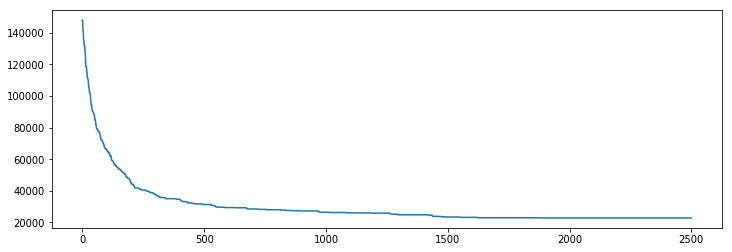

In [25]:
plt.figure(figsize=(12,4))
plt.plot(best)
plt.show()

In [186]:
best

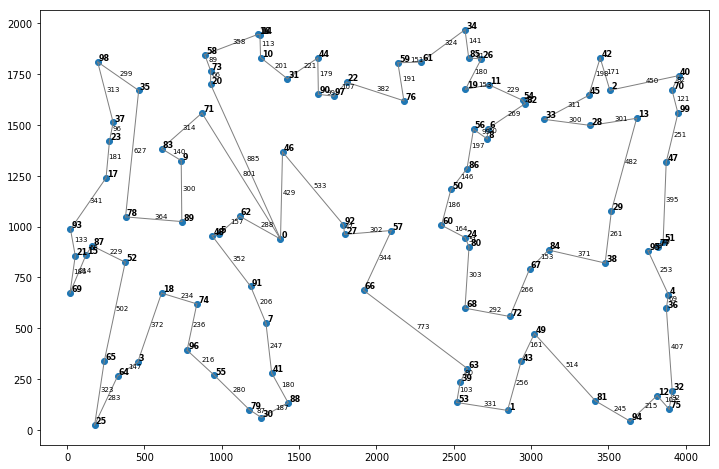

In [24]:
from matplotlib.lines import Line2D

route = best_chromosome
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [25]:
coords[0, 0]

1150.0

In [29]:
route

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])

In [35]:
best_chromosome

array([23, 12,  3,  9, 19,  1, 28,  2, 25,  8,  4, 20,  5, 11, 27,  0,  7,
       26, 22,  6, 24, 10, 21, 16, 13, 17, 14, 18, 15])

In [10]:
opt = np.array([1,
47,
93,
28,
67,
58,
61,
51,
87,
25,
81,
69,
64,
40,
54,
2,
44,
50,
73,
68,
85,
82,
95,
13,
76,
33,
37,
5,
52,
78,
96,
39,
30,
48,
100,
41,
71,
14,
3,
43,
46,
29,
34,
83,
55,
7,
9,
57,
20,
12,
27,
86,
35,
62,
60,
77,
23,
98,
91,
45,
32,
11,
15,
17,
59,
74,
21,
72,
10,
84,
36,
99,
38,
24,
18,
79,
53,
88,
16,
94,
22,
70,
66,
26,
65,
4,
97,
56,
80,
31,
89,
42,
8,
92,
75,
19,
90,
49,
6,
63]) - 1

In [11]:
len(opt)

100

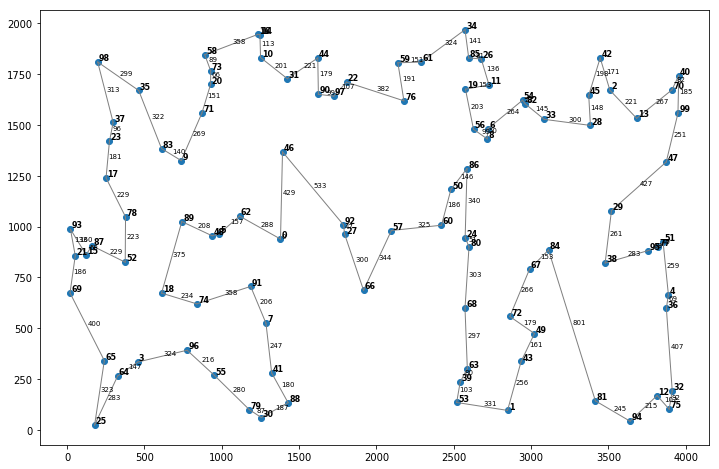

In [12]:
from matplotlib.lines import Line2D

route = opt
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [15]:
tsp_objective_function(opt)

21285.443181571081